<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Machine Learning Classifications with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-06-01 15:14:07--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2019-06-01 15:14:07 (303 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.1.23  |                0         126 KB  anaconda
    seaborn-0.9.0              |           py35_0         378 KB  anaconda
    certifi-2018.8.24          |           py35_1         139 KB  anaconda
    openssl-1.0.2s             |       h7b6447c_0         3.1 MB  anaconda
    ------------------------------------------------------------
                                           Total:         3.8 MB

The following packages will be UPDATED:

    ca-certificates: 2019.1.23-0          --> 2019.1.23-0       anaconda
    certifi:         2018.8.24-py35_1     --> 2018.8.24-py35_1  anaconda
    openssl:         1.0.2r-h7b6447c_0    --> 1.0.2s-h7b6447c_0 anaconda
    seaborn:         0

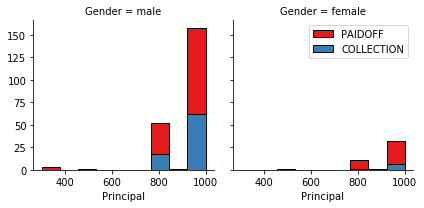

In [7]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

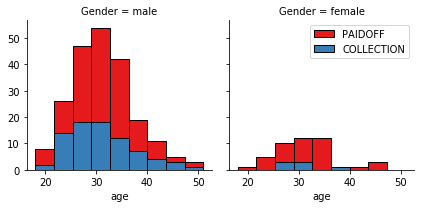

In [8]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

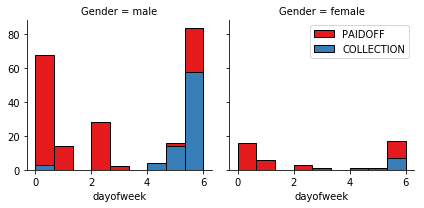

In [9]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [10]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [11]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [12]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [13]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [14]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [15]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [16]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [17]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [18]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classifications 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# 1. K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [19]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [20]:
# Train/Test Split
k = 6
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.155, random_state = k)

In [21]:
print ('Train set:', X_train1.shape,  y_train1.shape)
print ('Test set:', X_test1.shape,  y_test1.shape)

Train set: (292, 8) (292,)
Test set: (54, 8) (54,)


### Training/testing for k = 5

In [22]:
k = 5
clf1 = KNeighborsClassifier(n_neighbors = k).fit(X_train1, y_train1)
clf1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
yhat_knn = clf1.predict(X_test1)
yhat_knn[0:5]

array(['PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF'], dtype=object)

In [24]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train1, clf1.predict(X_train1)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test1, yhat_knn))

Train set Accuracy:  0.815068493151
Test set Accuracy:  0.796296296296


### Training/testing for k = 6

In [25]:
k = 6
clf_1 = KNeighborsClassifier(n_neighbors = k).fit(X_train1, y_train1)

In [26]:
yhat_knn_6 = clf_1.predict(X_test1)
yhat_knn_6[0:5]

array(['PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'COLLECTION'], dtype=object)

In [27]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train1, clf_1.predict(X_train1)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test1, yhat_knn_6))

Train set Accuracy:  0.801369863014
Test set Accuracy:  0.740740740741


### Training/testing for k = 7

In [28]:
k = 7
clf1_a = KNeighborsClassifier(n_neighbors = k).fit(X_train1,y_train1)
yhat_7 = clf1_a.predict(X_test1)
print("Train set Accuracy: ", metrics.accuracy_score(y_train1, clf1_a.predict(X_train1)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test1, yhat_7))

Train set Accuracy:  0.797945205479
Test set Accuracy:  0.722222222222


### KNN Best k

In [29]:
Ks = 20
mean = np.zeros((Ks-1))
std = np.zeros((Ks-1))
ConfusionMx = [];
for n in range(1,Ks):
     
    clf = KNeighborsClassifier(n_neighbors = n).fit(X_train1,y_train1)
    yhat=clf.predict(X_test1)
    mean[n-1] = metrics.accuracy_score(y_test1, yhat)

    
    std[n-1]=np.std(yhat==y_test1)/np.sqrt(yhat.shape[0])

mean

array([ 0.62962963,  0.61111111,  0.72222222,  0.68518519,  0.7962963 ,
        0.74074074,  0.72222222,  0.66666667,  0.7037037 ,  0.64814815,
        0.64814815,  0.62962963,  0.64814815,  0.61111111,  0.64814815,
        0.64814815,  0.64814815,  0.64814815,  0.64814815])

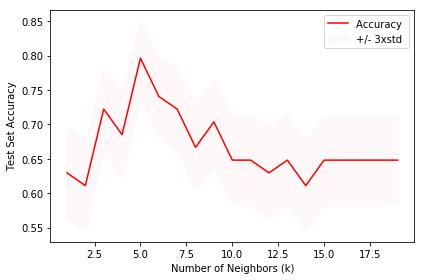

In [30]:
plt.plot(range(1,Ks),mean,'red')
plt.fill_between(range(1,Ks),mean - 1 * std, mean + 1 * std, alpha=0.10, color = 'pink')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Test Set Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.tight_layout()
plt.show()

## The optimal k value is 5 with an accuracy of 0.79

However, the accuracy on the test dataset was slightly lower (~79 percent), which is an indicator of a slight degree of overfitting

# 2. Decision Tree

In [31]:
# Import libraries
from sklearn.tree import DecisionTreeClassifier

In [32]:
# Train/Test Split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.155, random_state = 5)
print ('Train set:', X_train2.shape, y_train2.shape)
print ('Test set:', X_test2.shape, y_test2.shape)

Train set: (292, 8) (292,)
Test set: (54, 8) (54,)


In [33]:
clf2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 0)
clf2.fit(X_train2, y_train2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [34]:
yhat_dt = clf2.predict(X_test2)
yhat_dt[0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF'], dtype=object)

In [35]:
print("Decision Tree's Accuracy: ", metrics.accuracy_score(y_test2, yhat_dt))

Decision Tree's Accuracy:  0.666666666667


In [36]:
# checking max_depth = 3
clf2_3 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
clf2_3.fit(X_train2, y_train2)

yhat_dt_3 = clf2_3.predict(X_test2)

print("Decision Tree's Accuracy: ", metrics.accuracy_score(y_test2, yhat_dt_3))

Decision Tree's Accuracy:  0.666666666667


In [37]:
# checking max_depth = 6
clf2_6 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, random_state = 0)
clf2_6.fit(X_train2, y_train2)

yhat_dt_6 = clf2_6.predict(X_test2)

print("Decision Tree's Accuracy: ", metrics.accuracy_score(y_test2, yhat_dt_6))

Decision Tree's Accuracy:  0.62962962963


In [38]:
# checking max_depth = 11
clf2_11 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 11, random_state = 0)
clf2_11.fit(X_train2, y_train2)

yhat_dt_11 = clf2_11.predict(X_test2)

print("Decision Tree's Accuracy: ", metrics.accuracy_score(y_test2, yhat_dt_11))

Decision Tree's Accuracy:  0.685185185185


In [39]:
# checking max_depth = 12
clf2_12 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 12, random_state = 0)
clf2_12.fit(X_train2, y_train2)

yhat_dt_12 = clf2_12.predict(X_test2)

print("Decision Tree's Accuracy: ", metrics.accuracy_score(y_test2, yhat_dt_12))

Decision Tree's Accuracy:  0.703703703704


In [40]:
yhat_dt_12[0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF'], dtype=object)

### The performance of the DT model with max_depth 12 is notably better (70.3 percent) 

# 3. Support Vector Machine

In [41]:
# Import libraries
from sklearn import svm

### SVM - Radial basis function

In [42]:
# Train/Test Split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.155, random_state = 5)
print ('Train set:', X_train3.shape,  y_train3.shape)
print ('Test set:', X_test3.shape,  y_test3.shape)

Train set: (292, 8) (292,)
Test set: (54, 8) (54,)


In [43]:
clf3_rbf = svm.SVC(kernel = 'rbf', random_state = 0, gamma= 0.10, C = 10.0)
clf3_rbf.fit(X_train3, y_train3)
yhat_rbf = clf3_rbf.predict(X_test3)
print("Radial basis function's Accuracy: ", metrics.accuracy_score(y_test2, yhat_rbf))

Radial basis function's Accuracy:  0.592592592593


### SVM - Linear

In [44]:
clf3_l = svm.SVC(kernel = 'linear')
clf3_l.fit(X_train3, y_train3) 
yhat_l = clf3_l.predict(X_test3)
print("SVM Linear Accuracy: ", metrics.accuracy_score(y_test3, yhat_l))

SVM Linear Accuracy:  0.648148148148


### SVM - Sigmoid

In [45]:
clf3_sig = svm.SVC(kernel='sigmoid')
clf3_sig.fit(X_train2, y_train3) 
yhat_sig = clf3_sig.predict(X_test3)
print("Sigmoid Accuracy: ", metrics.accuracy_score(y_test3, yhat_sig))

Sigmoid Accuracy:  0.592592592593


### SVM - Polynomial

In [46]:
clf3_pol = svm.SVC(kernel = 'poly')
clf3_pol.fit(X_train3, y_train3)
yhat_pol = clf3_pol.predict(X_test3)
print("SMV Polynomial Accuracy: ", metrics.accuracy_score(y_test3, yhat_pol))

SMV Polynomial Accuracy:  0.648148148148


In [71]:
# can further be optimised by checking different 'degree' values for the kernel 'polynomial'
clf3_pol_1 = svm.SVC(kernel = 'poly', degree=20, C=5)
clf3_pol_1.fit(X_train3, y_train3)
yhat_pol_1 = clf3_pol_1.predict(X_test3)
print("SMV Polynomial Accuracy: ", metrics.accuracy_score(y_test3, yhat_pol_1))

SMV Polynomial Accuracy:  0.666666666667


In [48]:
# can further be optimised by checking different 'degree' values for the kernel 'polynomial'
clf3_pol_2 = svm.SVC(kernel = 'poly', degree=30, C=5)
clf3_pol_2.fit(X_train3, y_train3)
yhat_pol_2 = clf3_pol_2.predict(X_test3)
print("SMV Polynomial Accuracy: ", metrics.accuracy_score(y_test3, yhat_pol_2))

SMV Polynomial Accuracy:  0.648148148148


### The optimal SVM kernel function is Polynomial (degree 20) with an accuracy of 0.66

# 4. Logistic Regression

In [49]:
# Import libraries
from sklearn.linear_model import LogisticRegression

In [50]:
# Train/Test Split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size = 0.155, random_state = 10)
print ('Train set:', X_train4.shape,  y_train4.shape)
print ('Test set:', X_test4.shape,  y_test4.shape)

Train set: (292, 8) (292,)
Test set: (54, 8) (54,)


In [51]:
clf4 = LogisticRegression(C = 0.01, solver = 'saga', random_state = 0)
clf4.fit(X_train4, y_train4)
print ('Train set:', X_train4.shape,  y_train4.shape)
print ('Test set:', X_test4.shape,  y_test4.shape)

Train set: (292, 8) (292,)
Test set: (54, 8) (54,)


In [52]:
yhat_lr = clf4.predict(X_test4)
yhat_lr[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [53]:
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test4, yhat_lr))

Logistic Regression's Accuracy:  0.833333333333


In [54]:
#  decreasing the value of the inverse regularisation parameter C means that we are increasing the regularisation strength
clf4_1 = LogisticRegression(C = 0.0001, solver = 'saga', random_state = 0)
clf4_1.fit(X_train4, y_train4)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)

In [55]:
yhat_lr_1 = clf4_1.predict(X_test4)
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test4, yhat_lr_1))

Logistic Regression's Accuracy:  0.833333333333


In [56]:
# using different solvers
clf4_2 = LogisticRegression(solver = "newton-cg", C = 0.01, random_state = 0)
clf4_2.fit(X_train4, y_train4)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
yhat_lr_2 = clf4_2.predict(X_test4)
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test4, yhat_lr_2))

Logistic Regression's Accuracy:  0.833333333333


In [58]:
clf4_3 = LogisticRegression(solver = "lbfgs", C = 0.01, random_state = 0)
clf4_3.fit(X_train4, y_train4)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
yhat_lr_3 = clf4_3.predict(X_test4)
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test4, yhat_lr_3))

Logistic Regression's Accuracy:  0.833333333333


### Logistic Regression's Accuracy remains the same -  0.83

# Model Evaluation using Test set

In [60]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [61]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-06-01 15:21:14--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-06-01 15:21:14 (370 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [62]:
test_df = pd.read_csv('loan_test.csv')
test_df.head(3)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female


In [63]:
test_df.shape

(54, 10)

In [64]:
#Preprocessing as we did with the first dataset

test_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)
test_df.head()
test_df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

Feature_test = test_df[['Principal','terms','age','Gender']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace = True)
Feature_test.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,50,female,1,0,0
1,300,7,35,male,0,0,0
2,1000,30,43,female,0,1,0
3,1000,30,26,male,0,0,1
4,800,15,29,male,1,0,0


In [65]:
Feature_test['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature_test.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,50,1,1,0,0
1,300,7,35,0,0,0,0
2,1000,30,43,1,0,1,0
3,1000,30,26,0,0,0,1
4,800,15,29,0,1,0,0


In [66]:
X_test_set = Feature_test
X_test_set[0:5]

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,50,1,1,0,0
1,300,7,35,0,0,0,0
2,1000,30,43,1,0,1,0
3,1000,30,26,0,0,0,1
4,800,15,29,0,1,0,0


In [67]:
y_test = test_df['loan_status'].values
y_test[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [68]:
# KNN classifier evaluation
print("KNN_Test Set Accuracy: ", jaccard_similarity_score(y_test, yhat_knn))
print("KNN_Test Set Accuracy: ", f1_score(y_test, yhat_knn, average = 'weighted'))

KNN_Test Set Accuracy:  0.62962962963
KNN_Test Set Accuracy:  0.60758377425


In [69]:
# DT classifier evaluation
print("DT_Test Set Accuracy: ",  jaccard_similarity_score(y_test, yhat_dt_12))
print("DT_Test Set Accuracy: ", f1_score(y_test, yhat_dt_12, average = 'weighted'))

DT_Test Set Accuracy:  0.62962962963
DT_Test Set Accuracy:  0.63722697056


In [73]:
# SVM classifier evaluation
print("SVM_Test Set Accuracy: ", jaccard_similarity_score(y_test, yhat_pol_1))
print("SVM_Test Set Accuracy: ", f1_score(y_test, yhat_pol_1, average = 'weighted'))

SVM_Test Set Accuracy:  0.777777777778
SVM_Test Set Accuracy:  0.708937198068


In [75]:
# LogReg classifier evaluation

print("LR_Test Set Accuracy: ", jaccard_similarity_score(y_test, yhat_lr))
print("LR_Test Set Accuracy: ", f1_score(y_test, yhat_lr, average = 'weighted') )

LR_Test Set Accuracy:  0.740740740741
LR_Test Set Accuracy:  0.630417651694


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
clf_probs = clf4.predict_proba(X_test_set)
score = log_loss(y_test, clf_probs)
print("LR_Test Set Accuracy: ", score)

# I get a ValueError: X has 7 features per sample; expecting 8

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                |0.62     |0.60      | NA      |
| Decision Tree      |0.62     |0.63      | NA      |
| SVM                |0.77     |0.70      | NA      |
| LogisticRegression |0.74     |0.63      | ?    |

# The best classifier

In conclusion, SVM Classification was the best classifier on loan payout.



___________________________

##### If you had a table of samples with an empty loan_status column, you could test the estimators (clfs) :


In [ ]:
#test = np.array(test_table).reshape(len(test_table),-1)

#prediction1 = clf1.predict(test)
#prediction2 = clf2.predict(test)
#prediction3 = clf3.predict(test)
#prediction4 = clf4.predict(test)

#print('The prediction are : ' prediction1, prediction2,prediction3, prediction4)

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>